In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

from pylab import mpl

mpl.rcParams['font.family'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

def Base(salary:int, mode = "yearly", span = 10,deposit=0):
    if mode == "yearly":
        X = np.linspace(0,span,span+1)
        base_deposit = X * salary+deposit
        # plt.plot(X,base_deposit)
    return X,base_deposit

def calculate(salary:int, span:int, rate:float, mode="yearly",deposit=0):
    if mode == "yearly":
        X, base_deposit = Base(salary=salary,span=span,mode=mode,deposit=deposit)
        profit_deposit = np.empty_like(X)
        tmp=deposit;
        i=0
        for x in np.nditer(profit_deposit,op_flags=['readwrite']):
            x[...]=tmp
            tmp=salary+(1+rate)*tmp
            # print("第"+str(i)+"年的积蓄为"+str(x[...].round())+"元")
            i+=1
    return X, base_deposit, profit_deposit


def drawPlot(X,base,profit,salary ,rate,deposit):
    profit_per_year = profit.max()/X.max()
    if profit_per_year <=50000:
        step=10000
    elif 50000<=profit_per_year<100000:
        step=50000
    elif 100000<=profit_per_year<200000:
        step=100000
    elif 200000<=profit_per_year<500000:
        step=200000
    elif 500000<=profit_per_year<1000000:
        step=500000
    elif 1000000<=profit_per_year<2000000:
        step=1000000
    elif 2000000<=profit_per_year<5000000:
        step=2000000
    elif profit_per_year>=5000000:
        step=5000000
    width=0.35
    deposit_per_year = (profit.max()-base.max())/X.max()
    deposit_percent = deposit_per_year/salary*100
    title = "你    的    银    行\n"+"年薪："+str(round(salary/10000,1))+"万 目前积蓄："+str(round(deposit/10000,1))+"万 年化率："+str(rate)+"\n平均年收益："+str(round(deposit_per_year/10000,1))+"万 平均每年投资额外获利百分比："+str(round(deposit_percent,1))+"%"
    plt.figure(dpi=100,figsize=(10,8))
    plt.bar(X+width/2,profit,width=width,label="总积蓄",zorder=2)
    plt.title(label=title,fontsize=14)
    plt.bar(X-width/2,base,width=width,label="基本储蓄",zorder=3)
    plt.xlabel("年份",fontsize=14)
    plt.ylabel("积蓄（万元）",fontsize=14)
    plt.yticks(np.arange(0,profit.max()+base[1],step=step),(np.arange(0,(profit.max()+base[1])/10000,step=step/10000).tolist()))
    plt.ylim(bottom=0.8*base[0],top=1.1*profit.max())
    plt.xticks(np.arange(0,X.max()+1,step=1))
    plt.xlim(left=0)
    #添加数据标签
    for x, y, z  in zip(X,profit,base):
        if x==0 :
            continue
        plt.text(x, y+0.3, str(round(y/10000,1))+' +'+str(round((y-z)/10000,1))+','+str(round((y-z)/z*100,1))+"%", ha='center', va='center', fontsize=12,rotation=0,zorder=10)
    plt.grid(True)
    plt.fill_between(X,profit,base,label="理财收入",zorder=1)
    plt.legend()
    plt.show()
    return


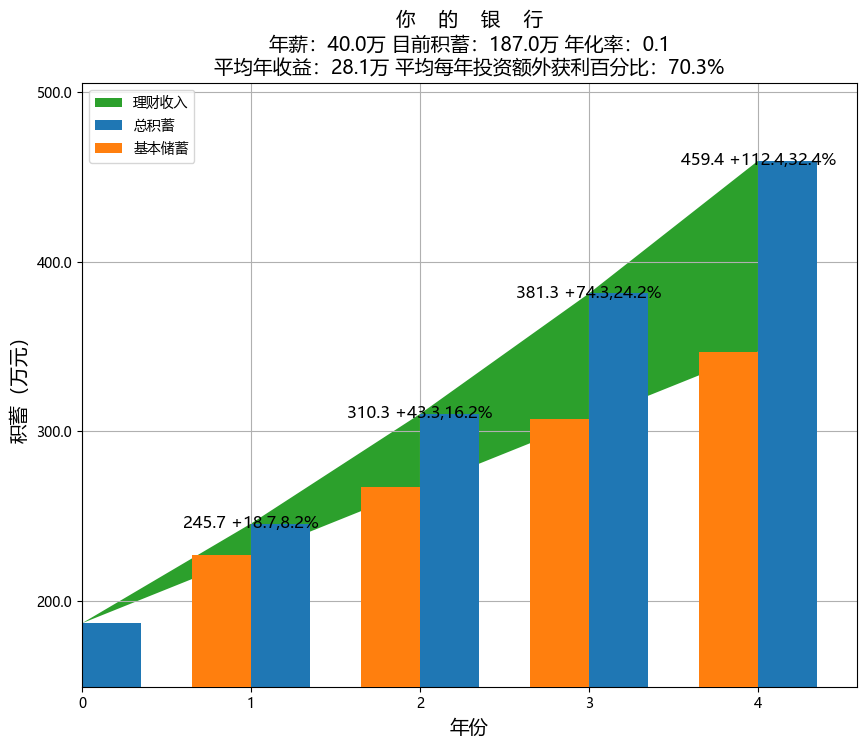

In [9]:
Salary_year = 10000*40
year = 4
rate = 0.10
deposit = 10000*187
X,base,profit = calculate(Salary_year,year,rate,deposit = deposit)
drawPlot(X,base,profit,salary = Salary_year,rate = rate,deposit=deposit)